In [1]:
# Zarur kutubxonalarni yuklab olamiz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# CSV fayldan ma'lumotlarni yuklaymiz
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")

In [5]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [7]:

#  Ma'lumotlarning birinchi 5 qatorini ko'rib chiqamiz
print(df.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

In [11]:
#  Xususiyatlar (Clump Thickness) va nishon (Mitoses) ustunlarini ajratamiz
# Misol uchun: CSV faylingizda 'Clump Thickness', 'Bare Nuclei', va 'Mitoses' ustunlari bo'lsa
X = df[['Clump Thickness', 'Bare Nuclei']]  # Kiruvchi xususiyatlar
y = df['Mitoses']                  # Chiquvchi qiymat (klass)

In [15]:
X

,Clump Thickness,Bare Nuclei
0,5,1
1,5,10
2,3,2
3,6,4
4,4,1
...,...,...
678,3,2
679,2,1
680,5,3
681,4,4


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
678    1
679    1
680    2
681    1
682    1
Name: Mitoses, Length: 683, dtype: int64

In [13]:
#  Ma'lumotlarni train va test to'plamlarga bo'lamiz (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Decision Tree klassifikator modelini yaratamiz
model = DecisionTreeClassifier(random_state=42)

In [21]:
#  Modelni o'qitamiz (train to'plamda)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
# Model yordamida test to'plamida bashorat qilamiz
y_pred = model.predict(X_test)

In [27]:
# Modelning aniqligini baholaymiz
accuracy = accuracy_score(y_test, y_pred)

In [29]:
accuracy

0.7707317073170732

In [31]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 77.07%


In [37]:
#  Batafsil klassifikatsiya natijasi
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(y.value_counts())



Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.97      0.88       163
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         8

    accuracy                           0.77       205
   macro avg       0.09      0.11      0.10       205
weighted avg       0.64      0.77      0.70       205

Mitoses
1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: count, dtype: int64


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           1       0.81      0.97      0.88       163
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         9
           4       1.00      0.00      0.00         2
           5       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         8

    accuracy                           0.77       205
   macro avg       0.42      0.11      0.10       205
weighted avg       0.66      0.77      0.70       205



In [41]:
# Confusion Matrix chizamiz
cm = confusion_matrix(y_test, y_pred)

In [43]:
cm

array([[158,   1,   2,   0,   0,   0,   0,   1,   1],
       [ 12,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0,   0,   0,   0,   0,   1,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   1,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0],
       [  7,   0,   1,   0,   0,   0,   0,   0,   0]], dtype=int64)

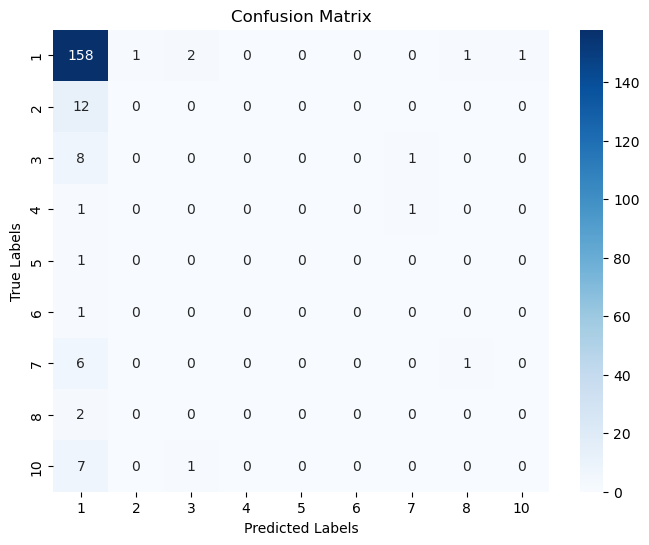

In [45]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

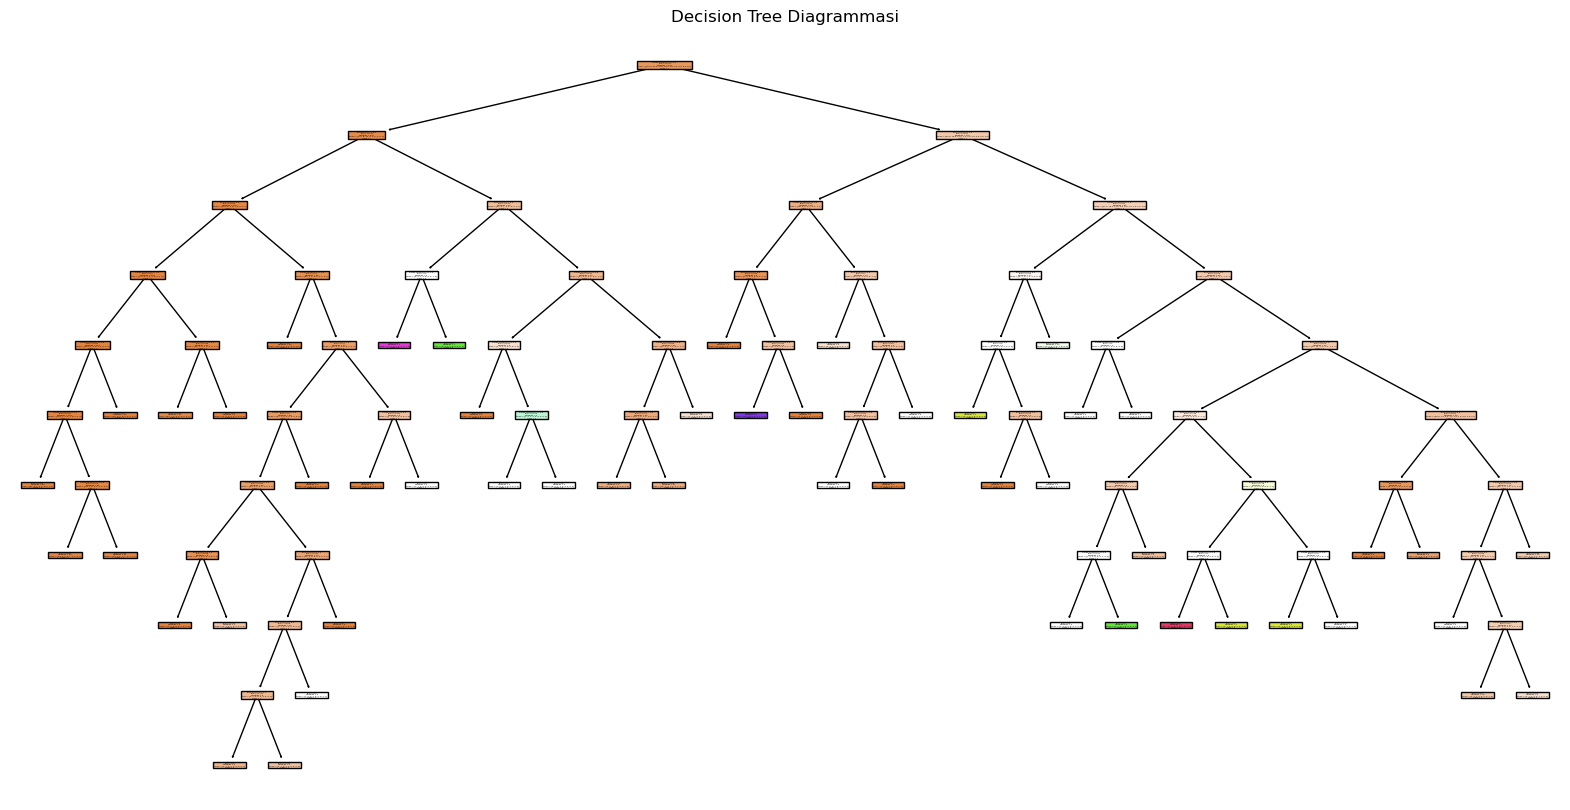

In [47]:
# 11. Decision Tree tuzilmasini chizamiz
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.title('Decision Tree Diagrammasi')
plt.show()

In [49]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [59]:
# 12. Agar 2ta feature bo'lsa - qaror chegarasi (decision boundary) grafik chizamiz
x_min, x_max = X['Bare Nuclei'].min() - 1, X['Bare Nuclei'].max() + 1
y_min, y_max = X['Clump Thickness'].min() - 1, X['Clump Thickness'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [61]:
# Meshgrid nuqtalarini pandas DataFrame ga aylantirib, predict qilamiz
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

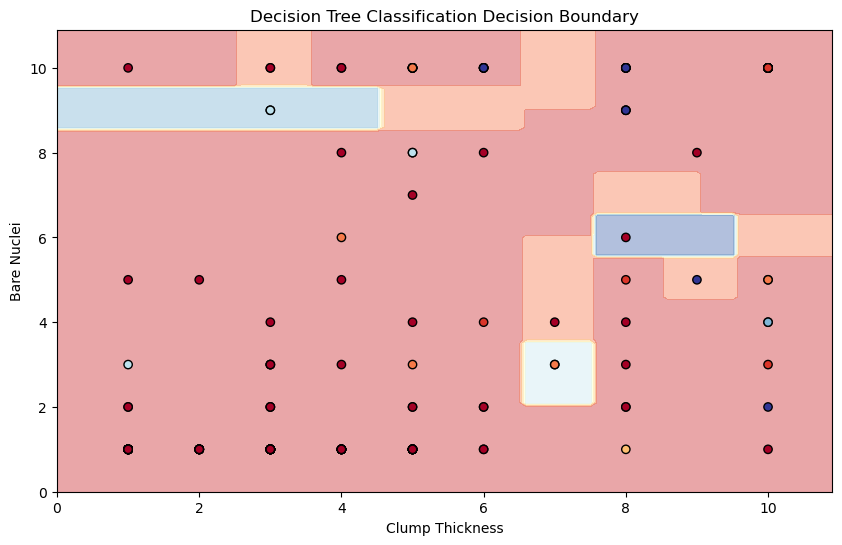

In [63]:
# Qaror chegarasi chiziladi
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_test['Clump Thickness'], X_test['Bare Nuclei'], c=y_test, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title('Decision Tree Classification Decision Boundary')
plt.xlabel('Clump Thickness')
plt.ylabel('Bare Nuclei')
plt.show()